#### Vocabulary Construction & Pruning System from Scratch

Raw Vocabulary Size: 13
Pruned Vocabulary Size: 9


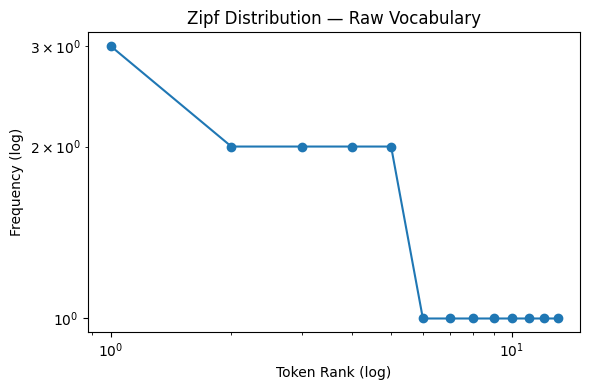

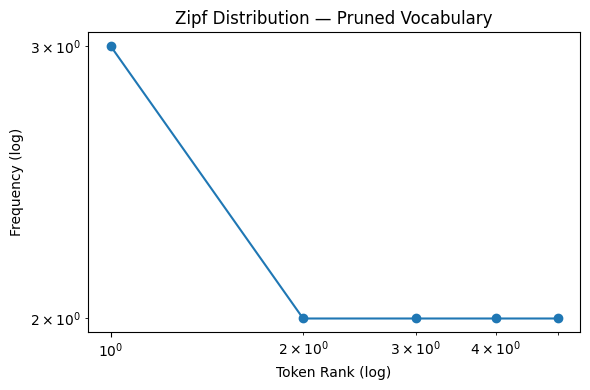

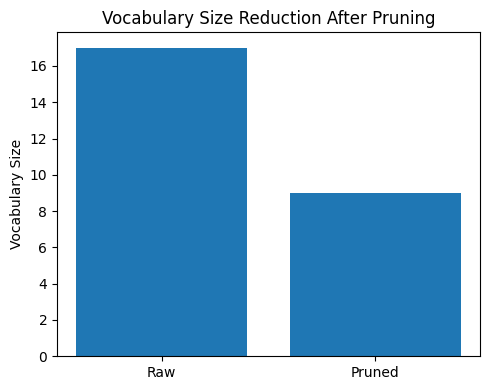

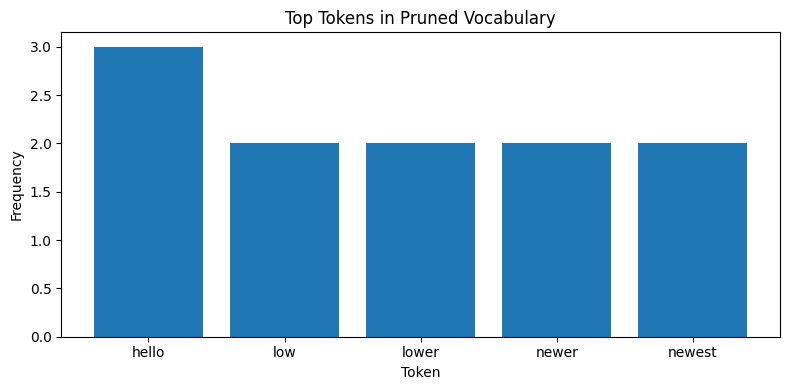

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

corpus = [
    "low lower lowest",
    "newer newer newest",
    "low newest lower",
    "hello world hello hello",
    "tokenization is important for llm systems"
]

def tokenize(text):
    return text.split()

def build_vocab(corpus):
    counter = Counter()
    for sentence in corpus:
        counter.update(tokenize(sentence))
    return counter
raw_vocab = build_vocab(corpus)
print("Raw Vocabulary Size:", len(raw_vocab))

def add_special_tokens(counter, specials=["<PAD>", "<UNK>", "<BOS>", "<EOS>"]):
    for token in specials:
        counter[token] = float("inf")
    return counter
raw_vocab = add_special_tokens(raw_vocab)

def prune_by_min_freq(counter, min_freq=2):
    return Counter({t: c for t, c in counter.items() if c >= min_freq})

def prune_top_k(counter, k=20):
    return Counter(dict(counter.most_common(k)))

def prune_vocab(counter, min_freq=2, max_size=30):
    pruned = prune_by_min_freq(counter, min_freq)
    if len(pruned) > max_size:
        pruned = prune_top_k(pruned, max_size)
    return pruned

pruned_vocab = prune_vocab(raw_vocab, min_freq=2, max_size=20)
print("Pruned Vocabulary Size:", len(pruned_vocab))

def build_token_id_maps(counter):
    token_to_id = {token: i for i, token in enumerate(counter)}
    id_to_token = {i: token for token, i in token_to_id.items()}
    return token_to_id, id_to_token

token_to_id, id_to_token = build_token_id_maps(pruned_vocab)

def plot_zipf(counter, title):
    freqs = [freq for token, freq in counter.most_common() if freq < 10**8]
    ranks = range(1, len(freqs) + 1)

    plt.figure(figsize=(6, 4))
    plt.loglog(ranks, freqs, marker="o")
    plt.title(title)
    plt.xlabel("Token Rank (log)")
    plt.ylabel("Frequency (log)")
    plt.tight_layout()
    plt.show()

plot_zipf(raw_vocab, "Zipf Distribution — Raw Vocabulary")
plot_zipf(pruned_vocab, "Zipf Distribution — Pruned Vocabulary")

plt.figure(figsize=(5, 4))
plt.bar(["Raw", "Pruned"], [len(raw_vocab), len(pruned_vocab)])
plt.title("Vocabulary Size Reduction After Pruning")
plt.ylabel("Vocabulary Size")
plt.tight_layout()
plt.show()

top_tokens = pruned_vocab.most_common(10)
labels = [t for t, _ in top_tokens]
values = [c for _, c in top_tokens]

plt.figure(figsize=(8, 4))
plt.bar(labels, values)
plt.title("Top Tokens in Pruned Vocabulary")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()